# reading netCDF file and plot spatial data

### imorting modules as needed

In [61]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
# Any import of metpy will activate the accessors
from metpy.cbook import get_test_data

Open the data with xarray module 

and read variable with metpy module

In [63]:
ds = xr.open_dataset("wrfout_d01_2016-01-23_01.nc")
data_var = ds.metpy.parse_cf('T2')
#ds #data explore
data_var # variables explore

<xarray.DataArray 'T2' (Time: 1, south_north: 199, west_east: 439)>
array([[[290.98706, 290.85248, ..., 283.38202, 283.46683],
        [290.82605, 290.67267, ..., 283.2815 , 283.383  ],
        ...,
        [273.135  , 273.0462 , ..., 245.53326, 246.5645 ],
        [273.1006 , 273.03705, ..., 244.2882 , 245.09744]]], dtype=float32)
Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
    XTIME    (Time) datetime64[ns] 2016-01-23T01:00:00
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  TEMP at 2 M
    units:        K
    stagger:

## read lattitude and longitudes 

In [64]:
y = data_var.XLAT #reading lattitudes
x = data_var.XLONG #reading longitude
#select variables at timestep
im_data = data_var.isel(Time=0)#.sel(isobaric=1000.)
im_data

<xarray.DataArray 'T2' (south_north: 199, west_east: 439)>
array([[290.98706, 290.85248, 290.86713, ..., 283.30627, 283.38202, 283.46683],
       [290.82605, 290.67267, 290.86298, ..., 283.2793 , 283.2815 , 283.383  ],
       [290.8958 , 290.56934, 290.8769 , ..., 282.34555, 283.2623 , 282.99014],
       ...,
       [273.50198, 273.7872 , 274.03317, ..., 245.64963, 246.2348 , 245.43802],
       [273.135  , 273.0462 , 273.12225, ..., 245.11818, 245.53326, 246.5645 ],
       [273.1006 , 273.03705, 273.0865 , ..., 243.87192, 244.2882 , 245.09744]],
      dtype=float32)
Coordinates:
    XLAT     (south_north, west_east) float32 24.62 24.62 24.62 ... 31.86 31.86
    XLONG    (south_north, west_east) float32 67.9 67.94 67.98 ... 86.06 86.1
    XTIME    datetime64[ns] 2016-01-23T01:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  TEMP at 2 M
    units:        K
    stagger:

# plotting

imshow ==> it'll show the image

extent ==> figure corners (we already read long and lat as x,y and from there we are giving corners

cmap ==> colourmap ( I prefer 'jet' because it's more vibrant

origin ==> from where figure start to show


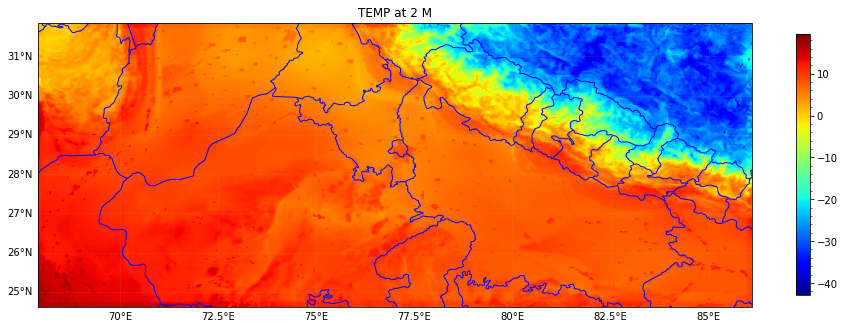

In [72]:
fig = plt.figure(figsize=(16, 16)) #open figure with size you need

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) #adding project within the opened figure

# here where magic happen
mp = ax.imshow(im_data-273.5,extent=(x.min(),x.max(), y.min(), y.max()),cmap='jet', origin='lower')


plt.title('TEMP at 2 M', fontsize=12)


#these are additional features you can add to geo plots (like boders, rivers, lakes..etc)
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='blue')
ax.add_feature(states_provinces, edgecolor='blue')
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.LAKES, alpha=0.5)
#ax.add_feature(cfeature.RIVERS)


# adding colorbar and adjust the size
cbar = fig.colorbar(mp, shrink=0.3)
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

plt.savefig("WRF_test.jpg",dpi=330)